##  **펭귄의 성별 예측 - 펭귄의 특성에 따른 성별 분류**

## <font color=green>**[ 데이터 준비하기 ]**

### **STEP 0 : 데이터파일 가져오기**
• 프로젝트에 사용할 데이터 파일을 다운로드한다. : ‘penguins_size.csv’

In [1]:
!gdown 1IvwpATWlthztepJf7CPxgcN0BebMSA9z

Downloading...
From: https://drive.google.com/uc?id=1IvwpATWlthztepJf7CPxgcN0BebMSA9z
To: c:\Users\STC\Desktop\04_머신러닝실습예제\penguins_size.csv

  0%|          | 0.00/13.9k [00:00<?, ?B/s]
100%|██████████| 13.9k/13.9k [00:00<00:00, 13.9MB/s]


### **STEP 1 : 라이브러리 가져오기**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **STEP 2 : 데이터 읽기 및 정보 파악하기**

**1) 파일 읽어 저장하기**
* 파일을 읽어 df에 저장 후 내용을 출력한다.

In [4]:
df = pd.read_csv('data/penguins_size.csv')
df.head()

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**[ 데이터 특성 ]**  

| 열인덱스 |  컬럼명   | 설명 및 단위 |
|----------|-----------|--------------|
|    0     | species   | 펭귄의 종 |
|   1      | island    | 펭귄의 데이터 측정 섬  |
|   2      | culmen_length  | 펭귄의 부리 길이, mm |
|   3      | culmen_depth | 펭귄의 부리 깊이, mm |
|   4      | flipper_length| 펭귄의 지느러미 길이, mm |
|   5      | body_mass  | 펭귄의 무게, g |
|   6      | sex        | 성별  |

**2) 데이터 정보 파악하기**
* 데이터 정보를 파악한다.

In [5]:
#코드작성
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   island          344 non-null    object 
 2   culmen_length   342 non-null    float64
 3   culmen_depth    342 non-null    float64
 4   flipper_length  342 non-null    float64
 5   body_mass       342 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


• 펭귄의 수컷과 암컷의 데이터 균형을 확인하기 위해 데이터의 ‘sex’ 컬럼의 레이블 개 수를 확인해보고 그래프로 출력한다.

In [ ]:
#코드작성
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

<Axes: xlabel='sex'>

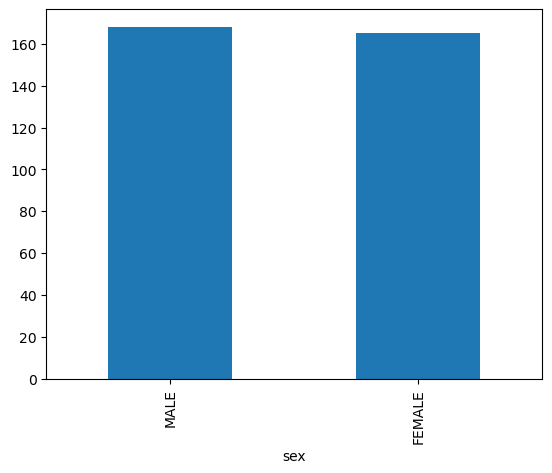

In [6]:
#코드작성
df['sex'].value_counts().plot(kind='bar')

**3) 데이터 처리**

**실습1. 데이터에 결측치가 있는지 확인하고, 결측치를 삭제한다.**

In [7]:
# 실습1_결측치 확인
df.isnull().sum()

species            0
island             0
culmen_length      2
culmen_depth       2
flipper_length     2
body_mass          2
sex               11
dtype: int64

In [8]:
# 실습1_결측치 삭제
df = df.dropna()

In [9]:
df.isnull().sum()

species           0
island            0
culmen_length     0
culmen_depth      0
flipper_length    0
body_mass         0
sex               0
dtype: int64

* ‘sex’컬럼의 ‘MALE’은 1로, ‘FEMALE’은 0으로 변경한다.

In [11]:
#코드작성
df.replace({'sex':{'MALE':1, 'FEMALE':0}}, inplace=True)

In [12]:
df.head()

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


### **STEP 3 : 기계학습 구현 준비**

**1) 특성/타켓 속성 지정하기**

* ‘culmen_length’, ‘culmen_depth’, ‘flipper_length’, ‘body_mass’를 특성으로   ‘sex'를 타겟 항목으로 지정한다.




In [16]:
#코드작성
x = df.drop(columns=['species', 'island', 'sex'])
y = df['sex']

**2) 학습/테스트 데이터 분리하기**

* train_test_split( )을 이용하여 7 :3의 비율로 학습 데이터셋(train set)과 테스트 데이 터셋(test set)으로 분리한 후 데이터의 모양을 확인한다.

In [17]:
#코드작성

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(266, 4)
(67, 4)
(266,)
(67,)


## <font color=green>**[ 기계학습 분류 모델 구현하기 ]**

### **STEP 1 : 라이브러리 가져오기**
* 사이킷런(scikit-learn) 라이브러리의 분류 알고리즘 KNeighborsClassifier 분류기 와 평가 관련 라이브러리를 가져온다.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **STEP 2 : 모델 객체 생성 및 학습하기**  


**1) 모델 객체 생성하기**

* KNeighborsClassifier( ) 모델 객체 ‘model_knn‘을 생성한다.

In [20]:
#코드작성
model_knn = KNeighborsClassifier(n_neighbors=3)
#기본값은 5

**2) 모델 학습하기**
* 학습 데이터셋(X_train, y_train)으로 모델(model_knn)을 학습(fit)을 한다.

In [22]:
#코드작성
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
dir(model_knn)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 '

### **STEP 3 : 모델 예측 및 평가하기**  

**1) 모델 예측하기**
* 학습된 모델을 사용하여 테스트 데이터셋(X_test)에 대한 예측값을 y_pred에 저장한다.

In [24]:
#코드작성
y_pred = model_knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0], dtype=int64)

* 테스트 데이터 레이블값(y_test)과 예측한 값(y_pred)을 항목으로 저장한 결과(df_ result)를 출력한다.

In [26]:
#코드작성
df_result = pd.DataFrame({'Actula': Y_test, 'Predicted': y_pred})
df_result.head(10)



,Actula,Predicted
30,0,0
317,0,0
79,1,1
201,0,0
63,1,1
304,0,0
289,1,1
186,1,0
217,1,1
203,1,1


**2) 모델 성능 평가**
* X_test, y_test로 생성한 모델(model_knn)의 정확도를 평가한다.

In [27]:
#코드작성
model_knn.score(X_test, Y_test)

0.8059701492537313

* 혼동 행렬을 이용하여 모델이 예측한 값(y_pred)이 실제값(y_test)을 얼마나 정확히 예측했는지 확인한다.

In [ ]:
#코드작성



array([[38, 10],
       [ 7, 45]])

*  입력된 데이터(y_test) 중 정확히 예측한 데이터(y_pred)의 정확도(accuracy), 정밀도 (precision), 재현율(recall), F1 점수(F1-score)를 확인한다.

In [ ]:
print("정확도: ", accuracy_score(y_test, y_pred))
print("정밀도: ", precision_score(y_test, y_pred))
print("재현율: ", recall_score(y_test, y_pred))
print("F1-Score: ",f1_score(y_test, y_pred))

정확도:  0.83
정밀도:  0.8181818181818182
재현율:  0.8653846153846154
F1-Score:  0.8411214953271028


*  scikitlearn의 metrics 라이브러리에서 제공하는 classification_report로 평가 지표 를 모두 확인해본다.

In [ ]:
#코드작성


## **모델 평가 지표**

- accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 공정 이상 예측에서는 recall 값 또한 살펴봐야 합니다.

- 오차행렬(Confusion Matrix)은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.

+ TN : Negative(0)로 예측했고, 실제로도 True인 경우 - 실제는 Negative
+ FP : Positive(1)로 예측했지만 실제는 False인 경우 - 실제는 Negative
+ FN : Negative(0)로 예측했고, 실제는 False인 경우 - 실제는 Positive
+ TP : Positive(1)로 예측했고, 실제로도 True인 경우 - 실제는 Positive

- recall 방식은 `예측한 이상 있음` 대비 `실제 이상 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

- 정밀도(Precision)는 예측을 Positve로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 정밀도는 FP가 낮아야 합니다.
+ TP / (FP + TP)

- 재현율(recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 말합니다. 재현율은 FN이 낮아야 합니다.
+ TP / (FN + TP)